---
# <font color="#CA3532">Práctica 3 de Neurocomputación – Curso 2020-2021</font>
### Escuela Politécnica Superior – Universidad Autónoma de Madrid

---
- Fecha de inicio: Lunes 15-04-2021 (Grupo 2462) / Martes 16-04-2021 (Grupo 2461)
- Fecha de entrega: Lunes 10-05-2021 (Grupo 2462) / Martes 11-05-2021 (Grupo 2461)

--- 

Última actualización: 15-04-2021

### <font color="#CA3532">Introducción</font>

- Esta práctica está centrada en [Keras](https://keras.io/)

- Keras es una biblioteca de redes neuronales de código abierto, diseñada para la experimentación con redes neuronales profundas, con especial atención a la facilidad de uso, modularidad y extensibilidad.

- Keras puede usar distintos motores. Aquí se usará con TensorFlow.



In [ ]:
### -------------------------------------------------------------------------------
### Incluid vuestros nombres, pareja y grupo aquí.
### -------------------------------------------------------------------------------

estudiantes = [{'nombre': 'Sergio Galán Martín', 'pareja': 'P03', 'grupo': '2462'},
               {'nombre': 'Alejandro Santorum Varela', 'pareja': 'P03', 'grupo': '2462'}]


### <font color="#CA3532">Importación de bibliotecas</font>

TensorFlow incluye oficialmente Keras en su última versión.

In [ ]:
# Importaciones

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout

from sklearn.preprocessing import StandardScaler

### <font color="#CA3532">Datos del problema</font>


In [ ]:
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv'
# Detalles en https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.names

dataset = np.loadtxt(dataset_url, delimiter=',')

print(dataset)

### -------------------------------------------------------------------------------
### Dividid los ejemplos en atributos y clases. Guardad el número de atributos.
### -------------------------------------------------------------------------------

x = dataset[:,:-1]
y = dataset[:,-1]
x_size = x.shape[1]

[[ 1.24   0.875 -0.205 -0.078  0.067  0.   ]
 [ 0.268  1.352  1.035 -0.332  0.217  0.   ]
 [ 1.567  0.867  1.3    1.041  0.559  0.   ]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671  1.   ]
 [ 0.15   0.933  2.363 -0.742 -0.617  0.   ]
 [ 0.137  0.714  1.35   0.972 -0.63   1.   ]]


In [ ]:
# Resultados de la división y el número de atributos

print(x)
print(y)
print(x_size)

[[ 1.24   0.875 -0.205 -0.078  0.067]
 [ 0.268  1.352  1.035 -0.332  0.217]
 [ 1.567  0.867  1.3    1.041  0.559]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671]
 [ 0.15   0.933  2.363 -0.742 -0.617]
 [ 0.137  0.714  1.35   0.972 -0.63 ]]
[0. 0. 0. ... 1. 0. 1.]
5


In [ ]:
# Normalizad los datos (si es necesario)

# scaler = StandardScaler()
# scaler.fit(x)
# x = scaler.transform(x)

### <font color="#CA3532">Definición del modelo de red neuronal</font>

- Cada capa del modelo lleva definidas una serie de propiedades (tamaño, función de activación, conectividad, etc.). 

- Usaremos el modelo secuencial que Keras para crear una red neuronal multicapa con propagación hacia adelante.



In [ ]:
# Definid el modelo con Keras

nn = Sequential()

### -------------------------------------------------------------------------------
### Añadir la capas completamente conectadas que consideréis al modelo
### -------------------------------------------------------------------------------

nn.add(Input(shape=(x_size,)))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))


### <font color="#CA3532">Compilación de la red neuronal</font>

- La compilación es la operación que contruye la red neuronal.

- La compilación incluye aspectos que se tendrán en cuenta en el entrenamiento de la red neuronal.

- En la secciones de abajo encontraréis enlaces a la documentación oficial donde podréis encontrar información sobre las distintas estrategias de cada uno de los aspectos.

- También es posible definid vuestras propias funciones.

#### <font color="#CA3532">Optimizador</font>

El optimizador es la estrategia para calcular las correcciones de los pesos.

https://keras.io/api/optimizers/


#### <font color="#CA3532"> Función de error (*Loss function*)</font>

La función de error calcula la cantidad que el modelo debe minimizar durante el entrenamiento.

https://keras.io/api/losses/

#### <font color="#CA3532">Métricas</font>

Una métrica es una función que juzga la actuación del modelo. Son funciones similares a las funciones de error pero, a diferencia de estas, no se aplican durante el entrenamiento, sino sobre los resultados. También pueden usarse las funciones de error como metricas.

https://keras.io/api/metrics/

In [ ]:
# Compilación

### -------------------------------------------------------------------------------
### Compilad vuestro modelo de red neuronal
### -------------------------------------------------------------------------------
nn.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

### <font color="#CA3532">Entrenamiento de la red neuronal</font>

El método "fit" entrena una red neuronal con los datos que se le proporcionen.

Usaremos un 20 % de los datos para validación aunque están permitidas otras maneras de validar, incluso de optimizar de parámetros.

https://keras.io/api/models/model_training_apis/#fit-method

In [ ]:
# Entrenamiento

history = nn.fit(x, y, epochs=1000, verbose=0, validation_split=0.2)

# Detalles de la red neuronal

nn.summary()
print('\n\n')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________





In [ ]:

# Evaluación (es como "fit" en tanto que realiza una época con todos los datos pero sin cambiar ningún peso de la red neuronal)

loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy * 100))

# Además de "evaluate", hay otro método, "predict", que sirve para etiquetar datos no etiquetados.

169/169 [==============================] - 0s 2ms/step - loss: 0.3113 - binary_accuracy: 0.8605
Accuracy: 86.05


### <font color="#CA3532">Visualización de resultados del entrenamiento</font>

- El objeto *history* guarda los resultados de cada época.

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


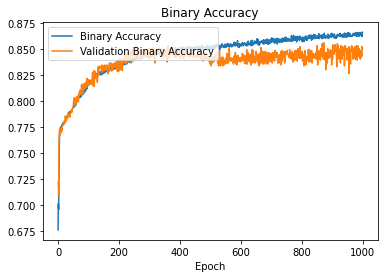

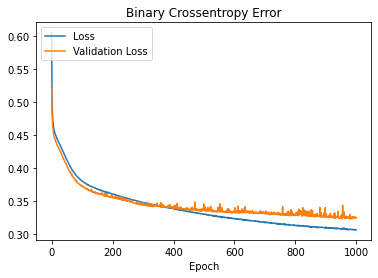

In [ ]:
# Visualizar los resultados del entrenamiento

print(history.history.keys())

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
### -------------------------------------------------------------------------------
### Explicad lo que se observa con distintas confifuraciones: 
### -------------------------------------------------------------------------------

### Usando un número pequeño de neuronas en el capa oculta (~= neuronas de la capa de entrada)

### Usando un número grande de neuroras en la capa oculta (>> neuronas de la capa de entrada)

Siguiendo las instrucciones indicadas, vamos a entrenar un perceptrón multicapa con una única capa oculta de 5 (x_size) neuronas.

169/169 [==============================] - 0s 2ms/step - loss: 0.3782 - binary_accuracy: 0.8125
Accuracy: 81.25


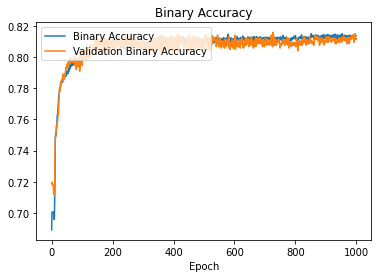

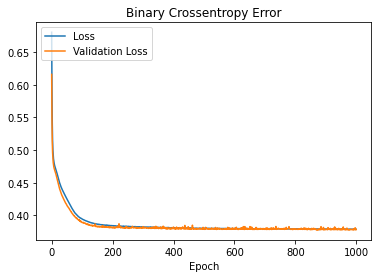

In [ ]:
nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dense(x_size, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

history = nn.fit(x, y, epochs=1000, verbose=0, validation_split=0.2)

loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy * 100))

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()



Y ahora probaremos a modificar esa capa oculta para que albergue un mayor número de neuronas, escogiendo un valor más alto como puede ser 128

169/169 [==============================] - 0s 2ms/step - loss: 0.3058 - binary_accuracy: 0.8640
Accuracy: 86.40


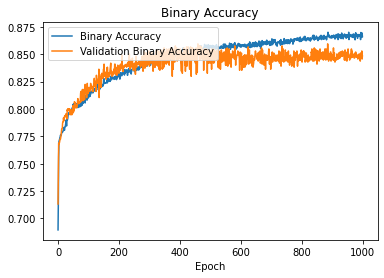

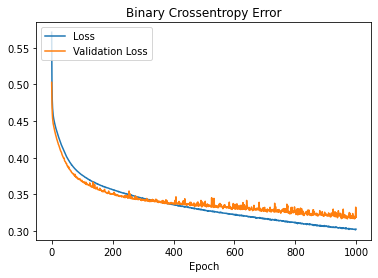

In [ ]:
nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

history = nn.fit(x, y, epochs=1000, verbose=0, validation_split=0.2)

loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy * 100))

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

Como podemos ver comparando los resultados de ambos experimentos, un mayor número de neuronas nos proporciona un mayor porcentaje de acierto en el conjunto de test. Sin embargo, en las gráficas notamos que la predicción es algo más irregular con el mayor número de neuronas, en el sentido de que el porcentaje de acierto en el conjunto de validación está algo más alejado del porcentaje de acierto del conjunto de entrenamiento.

### <font color="#CA3532">Optimización del modelo de red neuronal</font>

- Cambiad la arquitectura de la red neuronal introduciendo más capas y neuronas para conseguir mejores resultados:
 - Añadid más capas o diferente tipo de capas.
 - Cambiad las funciones de activación.
 - Cambiad la función de error o el optimizador.



In [ ]:
sum(y)/len(y)*100

29.348630643967432

Como las distintas clases están **desbalanceadas** (29,35% de clase 1 frente a 70,05% de clase 0), vamos a usar **diferentes métricas** ya que en estos casos la accuracy por si sola no es una buena métrica.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
metrics = ['binary_accuracy', k.metrics.Precision(name='P'), k.metrics.Recall(name='R')]

**Primer experimento: Cambio de optimizador**

Adam

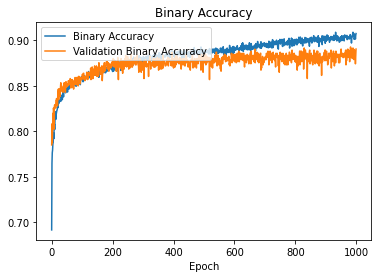

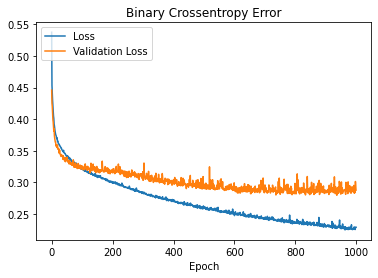

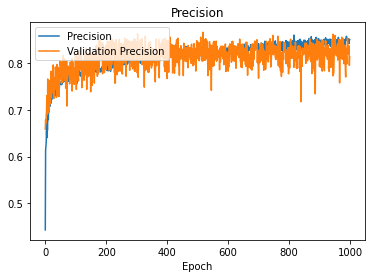

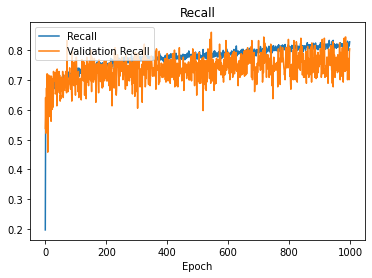

136/136 [==============================] - 0s 3ms/step - loss: 0.2341 - binary_accuracy: 0.9040 - P: 0.8346 - R: 0.8379
Train Binary Accuracy: 90.40
Train Precision: 83.46
Train Recall: 83.79
34/34 [==============================] - 0s 3ms/step - loss: 0.2939 - binary_accuracy: 0.8871 - P: 0.8328 - R: 0.7757
Test Binary Accuracy: 88.71
Test Precision: 83.28
Test Recall: 77.57


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

history = nn.fit(x_train, y_train, epochs=1000, verbose=0, validation_split=0.2)

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['P'], label='Precision')
plt.plot(history.history['val_P'], label='Validation Precision')
plt.title('Precision')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['R'], label='Recall')
plt.plot(history.history['val_R'], label='Validation Recall')
plt.title('Recall')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

loss, binary_accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Train Precision: %.2f' % (precision*100))
print('Train Recall: %.2f' % (recall*100))

loss, binary_accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Test Precision: %.2f' % (precision*100))
print('Test Recall: %.2f' % (recall*100))

RMSProp

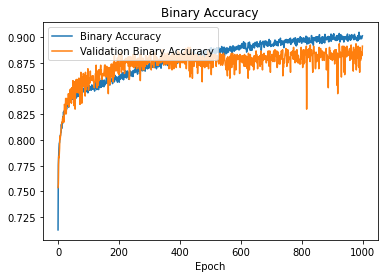

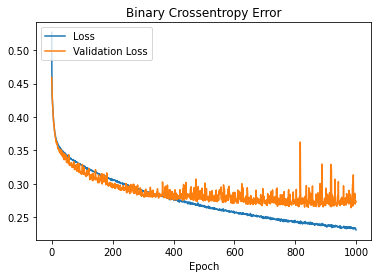

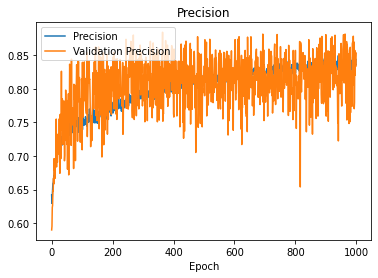

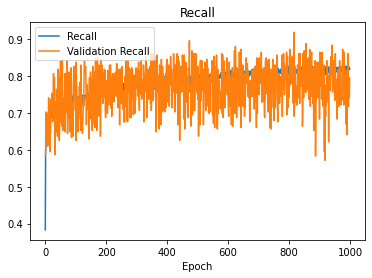

136/136 [==============================] - 0s 3ms/step - loss: 0.2374 - binary_accuracy: 0.9017 - P: 0.8555 - R: 0.8041
Train Binary Accuracy: 90.17
Train Precision: 85.55
Train Recall: 80.41
34/34 [==============================] - 0s 3ms/step - loss: 0.3086 - binary_accuracy: 0.8742 - P: 0.7826 - R: 0.7672
Test Binary Accuracy: 87.42
Test Precision: 78.26
Test Recall: 76.72


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=metrics)

history = nn.fit(x_train, y_train, epochs=1000, verbose=0, validation_split=0.2)

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['P'], label='Precision')
plt.plot(history.history['val_P'], label='Validation Precision')
plt.title('Precision')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['R'], label='Recall')
plt.plot(history.history['val_R'], label='Validation Recall')
plt.title('Recall')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

loss, binary_accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Train Precision: %.2f' % (precision*100))
print('Train Recall: %.2f' % (recall*100))

loss, binary_accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Test Precision: %.2f' % (precision*100))
print('Test Recall: %.2f' % (recall*100))

Como podemos ver, ambos optimizadores obtienen **mejores resultados** que el Stochastic Gradient Descent, siendo los resultados obtenidos con Adam **ligeramente mejores** que los obtenidos con RMSProp. Además, este último optimizador tiene un **gran ruido en la Precision y el Recall** del conjunto de validación, no siendo esta tan exagerada con el Adam, por lo que de ahora en adelante usaremos este optimizador.

**Segundo experimento: Variación número de capas**

Ahora modificaremos la estructura interna del perceptrón multicapa para ver cómo varían los resultados al añadir capas ocultas con diferente número de neuronas.

Dos capas, 16 y 32 neuronas

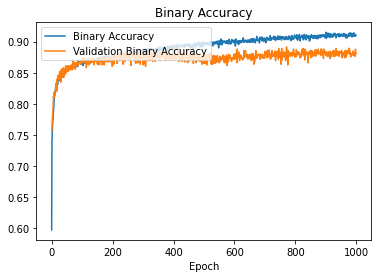

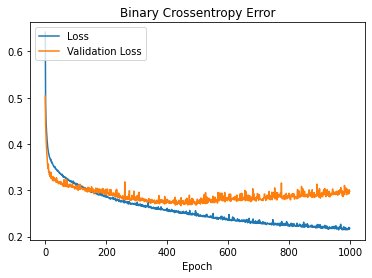

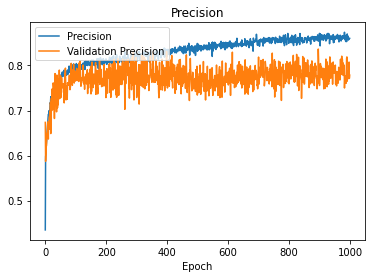

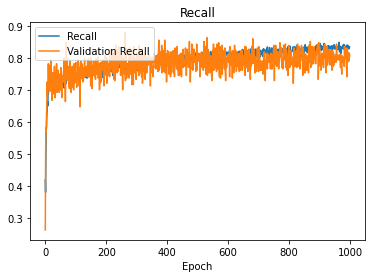

136/136 [==============================] - 0s 3ms/step - loss: 0.2279 - binary_accuracy: 0.9077 - P: 0.8455 - R: 0.8409
Train Binary Accuracy: 90.77
Train Precision: 84.55
Train Recall: 84.09
34/34 [==============================] - 0s 3ms/step - loss: 0.3222 - binary_accuracy: 0.8686 - P: 0.7625 - R: 0.7871
Test Binary Accuracy: 86.86
Test Precision: 76.25
Test Recall: 78.71


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dense(16, activation='relu'))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

history = nn.fit(x_train, y_train, epochs=1000, verbose=0, validation_split=0.2)

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['P'], label='Precision')
plt.plot(history.history['val_P'], label='Validation Precision')
plt.title('Precision')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['R'], label='Recall')
plt.plot(history.history['val_R'], label='Validation Recall')
plt.title('Recall')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

loss, binary_accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Train Precision: %.2f' % (precision*100))
print('Train Recall: %.2f' % (recall*100))

loss, binary_accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Test Precision: %.2f' % (precision*100))
print('Test Recall: %.2f' % (recall*100))

Dos capas, 32 y 64 neuronas

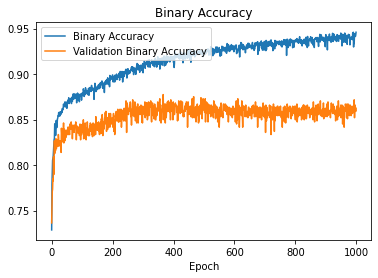

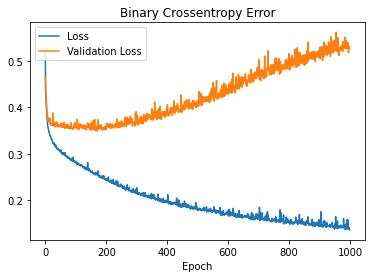

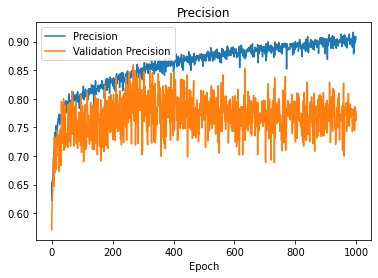

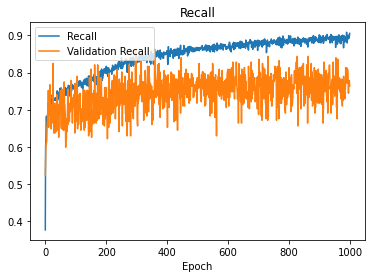

136/136 [==============================] - 0s 3ms/step - loss: 0.2073 - binary_accuracy: 0.9325 - P: 0.8889 - R: 0.8791
Train Binary Accuracy: 93.25
Train Precision: 88.89
Train Recall: 87.91
34/34 [==============================] - 0s 3ms/step - loss: 0.4927 - binary_accuracy: 0.8807 - P: 0.8077 - R: 0.7850
Test Binary Accuracy: 88.07
Test Precision: 80.77
Test Recall: 78.50


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

history = nn.fit(x_train, y_train, epochs=1000, verbose=0, validation_split=0.2)

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['P'], label='Precision')
plt.plot(history.history['val_P'], label='Validation Precision')
plt.title('Precision')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['R'], label='Recall')
plt.plot(history.history['val_R'], label='Validation Recall')
plt.title('Recall')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

loss, binary_accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Train Precision: %.2f' % (precision*100))
print('Train Recall: %.2f' % (recall*100))

loss, binary_accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Test Precision: %.2f' % (precision*100))
print('Test Recall: %.2f' % (recall*100))

Tres capas, 32, 64 y 128 neuronas

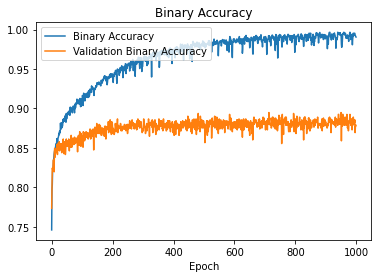

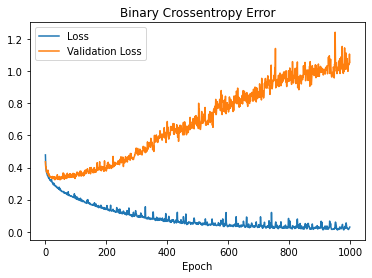

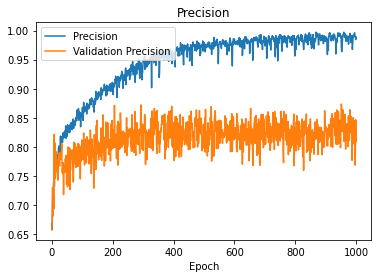

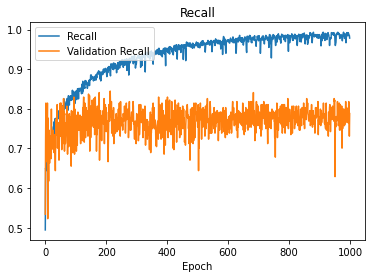

136/136 [==============================] - 0s 3ms/step - loss: 0.2212 - binary_accuracy: 0.9725 - P: 0.9539 - R: 0.9532
Train Binary Accuracy: 97.25
Train Precision: 95.39
Train Recall: 95.32
34/34 [==============================] - 0s 4ms/step - loss: 0.7736 - binary_accuracy: 0.9075 - P: 0.8423 - R: 0.8257
Test Binary Accuracy: 90.75
Test Precision: 84.23
Test Recall: 82.57


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

history = nn.fit(x_train, y_train, epochs=1000, verbose=0, validation_split=0.2)

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['P'], label='Precision')
plt.plot(history.history['val_P'], label='Validation Precision')
plt.title('Precision')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['R'], label='Recall')
plt.plot(history.history['val_R'], label='Validation Recall')
plt.title('Recall')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

loss, binary_accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Train Precision: %.2f' % (precision*100))
print('Train Recall: %.2f' % (recall*100))

loss, binary_accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Test Precision: %.2f' % (precision*100))
print('Test Recall: %.2f' % (recall*100))

Vemos que con un **número mayor de capas ocultas** (3) y un **alto número de neuronas** por capa obtenemos unos resultados **mejores** que los anteriores (**90,75%** de porcentaje de acierto en el conjunto de test), aunque en las gráficas apreciamos cierto **sobreajuste** que intentaremos subsanar en los experimentos 4 y 5. 

**Tercer experimento: Búsqueda de hiperparámetros automática con Tuner**

En este experimento vamos a utilizar la herramienta **Tuner**, y más en concreto su función **RandomSearch**, para tratar de buscar los parámetros **óptimos** para la red neuronal (número de neuronas en cada capa y tasa de aprendizaje) con un modelo de **dos capas ocultas** y otro de **tres capas ocultas**. Para ello hemos probado con valores del número de neuronas por capa entre **32 y 128**, y una tasa de aprendizaje de entre **0.01 y 0.0001**.

Dos capas ocultas

In [ ]:
metrics = ['binary_accuracy', k.metrics.Precision(name='P'), k.metrics.Recall(name='R')]

In [ ]:
!pip install -U keras-tuner
from kerastuner.tuners import RandomSearch

In [ ]:
def build_model(hp):
  nn = Sequential()
  nn.add(Input(shape=(x_size,)))
  nn.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=16), activation="relu"))
  nn.add(Dense(hp.Int('units_2', min_value=32, max_value=128, step=16), activation="relu"))
  nn.add(Dense(1, activation="sigmoid"))
  nn.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=metrics)
  return nn

In [ ]:
tuner = RandomSearch(build_model, objective='val_binary_accuracy', max_trials=5, executions_per_trial=3, project_name='test_2')
tuner.search_space_summary()
tuner.search(x, y, epochs=100, validation_split=0.2, verbose=0)

Search space summary
Default search space size: 3
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in ./test_2
Showing 10 best trials
Objective(name='val_binary_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 48
units_2: 96
learning_rate: 0.01
Score: 0.893308679262797
Trial summary
Hyperparameters:
units_1: 96
units_2: 64
learning_rate: 0.01
Score: 0.8923836151758829
Trial summary
Hyperparameters:
units_1: 112
units_2: 80
learning_rate: 0.01
Score: 0.890533447265625
Trial summary
Hyperparameters:
units_1: 48
units_2: 48
learning_rate: 0.01
Score: 0.8874498804410299
Trial summary
Hyperparameters:
units_1: 80
units_2: 48
learning_rate: 0.001
Score: 0.8754239877065023


In [ ]:
best_nn = tuner.get_best_models(num_models=1)
best_nn[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 96)                4704      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 97        
Total params: 5,089
Trainable params: 5,089
Non-trainable params: 0
_________________________________________________________________


A la vista de los resultados del RandomSearch, vemos que la configuración con dos capas ocultas de 48 y 96 neuronas dan un porcentaje de acierto de 89,33%, mayor que nuestros anteriores experimentos con dos capas ocultas. Vamos a intentar obtener mejores resultados con la búsqueda de parámetros para tres capas ocultas.

In [ ]:
Tres capas ocultas

In [ ]:
def build_model_3_layer(hp):
  nn = Sequential()
  nn.add(Input(shape=(x_size,)))
  nn.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=16), activation="relu"))
  nn.add(Dense(hp.Int('units_2', min_value=32, max_value=128, step=16), activation="relu"))
  nn.add(Dense(hp.Int('units_3', min_value=32, max_value=128, step=16), activation="relu"))
  nn.add(Dense(1, activation="sigmoid"))
  nn.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=metrics)
  return nn

In [ ]:
tuner = RandomSearch(build_model_3_layer, objective='val_binary_accuracy', max_trials=5, executions_per_trial=3, project_name='test_4')
tuner.search_space_summary()
tuner.search(x, y, epochs=100, validation_split=0.2, verbose=0)

Search space summary
Default search space size: 4
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in ./test_4
Showing 10 best trials
Objective(name='val_binary_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 128
units_2: 80
units_3: 112
learning_rate: 0.01
Score: 0.892691950003306
Trial summary
Hyperparameters:
units_1: 64
units_2: 80
units_3: 64
learning_rate: 0.001
Score: 0.89053346713384
Trial summary
Hyperparameters:
units_1: 112
units_2: 64
units_3: 96
learning_rate: 0.0001
Score: 0.8606229027112325
Trial summary
Hyperparameters:
units_1: 80
units_2: 48
units_3: 128
learning_rate: 0.0001
Score: 0.8603145480155945
Trial summary
Hyperparameters:
units_1: 64
units_2: 48
units_3: 96
learning_rate: 0.0001
Score: 0.8550724585851034


En este caso RandomSearch nos da un porcentaje de acierto de un **89,27%** con una configuración de **128, 80 y 112** neuronas en cada capa oculta y con una tasa de aprendizaje de **0.01**. Vemos que este resultado es algo inferior al obtenido al final del experimento anterior, pero también tenemos que tener en cuenta que en RandomSearch se han ejecutado un **número significativamente menor de épocas** de las del experimento anterior. Por ello, vamos a entrenar ambos modelos (el de dos capas ocultas y el de tres capas ocultas) **aumentando el número de épocas**.

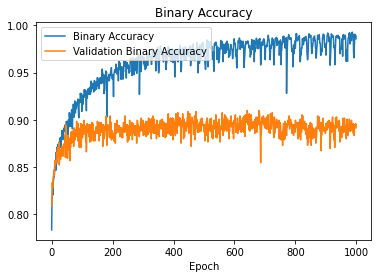

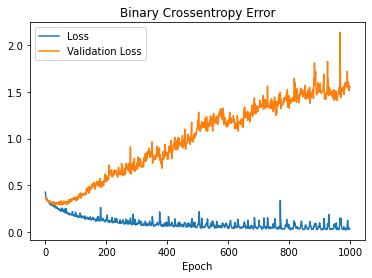

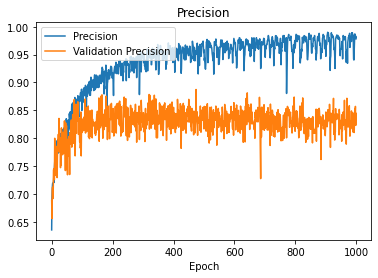

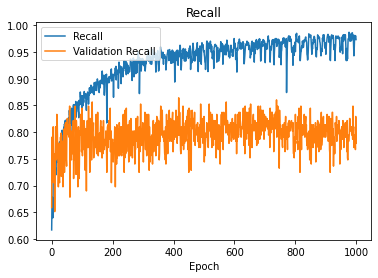

136/136 [==============================] - 1s 4ms/step - loss: 0.3442 - binary_accuracy: 0.9658 - P: 0.9585 - R: 0.9240
Train Binary Accuracy: 96.58
Train Precision: 95.85
Train Recall: 92.40
34/34 [==============================] - 0s 4ms/step - loss: 1.5498 - binary_accuracy: 0.8760 - P: 0.8099 - R: 0.7419
Test Binary Accuracy: 87.60
Test Precision: 80.99
Test Recall: 74.19


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dense(48, activation='relu'))
nn.add(Dense(96, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=metrics)
history = nn.fit(x_train, y_train, epochs=1000, verbose=0, validation_split=0.2)

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['P'], label='Precision')
plt.plot(history.history['val_P'], label='Validation Precision')
plt.title('Precision')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['R'], label='Recall')
plt.plot(history.history['val_R'], label='Validation Recall')
plt.title('Recall')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

loss, binary_accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Train Precision: %.2f' % (precision*100))
print('Train Recall: %.2f' % (recall*100))

loss, binary_accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Test Precision: %.2f' % (precision*100))
print('Test Recall: %.2f' % (recall*100))

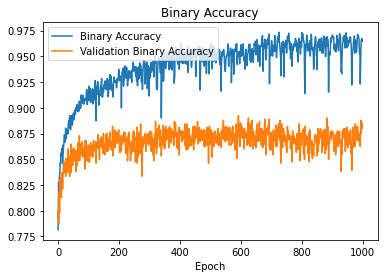

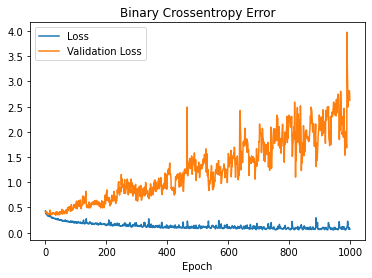

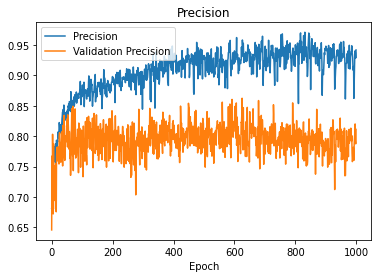

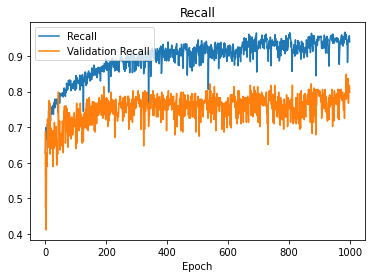

136/136 [==============================] - 1s 4ms/step - loss: 0.5690 - binary_accuracy: 0.9554 - P: 0.9174 - R: 0.9339
Train Binary Accuracy: 95.54
Train Precision: 91.74
Train Recall: 93.39
34/34 [==============================] - 0s 4ms/step - loss: 1.8744 - binary_accuracy: 0.9001 - P: 0.8185 - R: 0.8239
Test Binary Accuracy: 90.01
Test Precision: 81.85
Test Recall: 82.39


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(80, activation='relu'))
nn.add(Dense(112, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=metrics)
history = nn.fit(x_train, y_train, epochs=1000, verbose=0, validation_split=0.2)

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['P'], label='Precision')
plt.plot(history.history['val_P'], label='Validation Precision')
plt.title('Precision')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['R'], label='Recall')
plt.plot(history.history['val_R'], label='Validation Recall')
plt.title('Recall')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

loss, binary_accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Train Precision: %.2f' % (precision*100))
print('Train Recall: %.2f' % (recall*100))

loss, binary_accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Test Precision: %.2f' % (precision*100))
print('Test Recall: %.2f' % (recall*100))

Vemos que, pese a haber aumentado el número de épocas, el resultado obtenido es ligeramente peor que el de la configuración final del experimento anterior (32, 64 y 128, usando menos neuronas que en este experimento) habiendo obtenido un **90,75%** de porcentaje de acierto frente al **90,01%** obtenido ahora. Además, la primera también tiene un **84,23%** de precisión, frente al **81,85%** obtenido en este segundo caso.

**Cuarto experimento: Reducir sobreaprendizaje usando Dropout**

Vistos los resultados de las dos mejores redes neuronales encontradas por la herramienta *Tuner*, vemos que la de **tres capas ocultas es la que mejor porcentaje de acierto** nos da, aunque con un **marcado sobreaprendizaje** que podemos apreciar en las dos primeras gráficas de la celda anterior. Para tratar de reducir este sobreaprendizaje utilizaremos la técnica de *dropout* **eliminando neuronas** a cada época según una cierta **probabilidad** que le proporcionemos. Aplicaremos este Dropout a la mejor red neuronal de dos capas dada por el Tuner con el objetivo de apreciar en un menor número de capas la acción del Dropout sobre los resultados.

Dropout de 0.2 en ambas capas

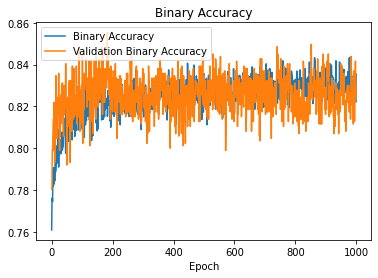

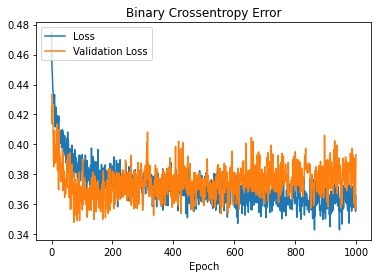

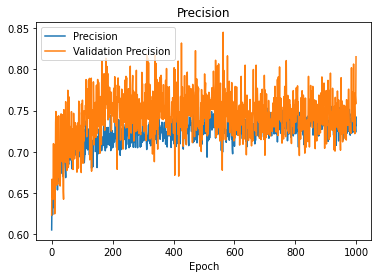

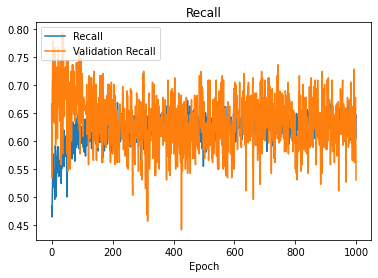

136/136 [==============================] - 1s 4ms/step - loss: 0.3682 - binary_accuracy: 0.8277 - P: 0.8074 - R: 0.5261
Train Binary Accuracy: 82.77
Train Precision: 80.74
Train Recall: 52.61
34/34 [==============================] - 0s 5ms/step - loss: 0.4070 - binary_accuracy: 0.7993 - P: 0.8029 - R: 0.4869
Test Binary Accuracy: 79.93
Test Precision: 80.29
Test Recall: 48.69


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dropout(0.2))
nn.add(Dense(48, activation='relu'))
nn.add(Dropout(0.2))
nn.add(Dense(96, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=metrics)
history = nn.fit(x_train, y_train, epochs=1000, verbose=0, validation_split=0.2)

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['P'], label='Precision')
plt.plot(history.history['val_P'], label='Validation Precision')
plt.title('Precision')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['R'], label='Recall')
plt.plot(history.history['val_R'], label='Validation Recall')
plt.title('Recall')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

loss, binary_accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Train Precision: %.2f' % (precision*100))
print('Train Recall: %.2f' % (recall*100))

loss, binary_accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Test Precision: %.2f' % (precision*100))
print('Test Recall: %.2f' % (recall*100))

Dropout de 0.2 en la primera capa

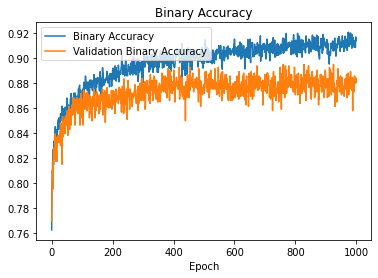

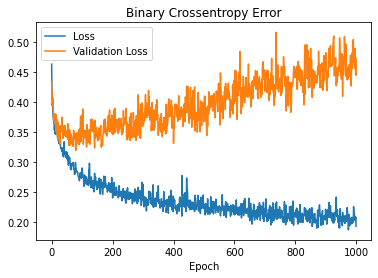

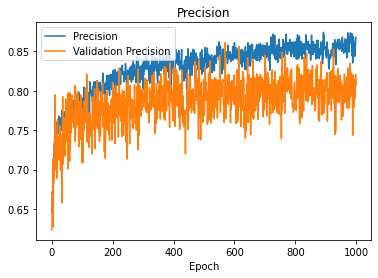

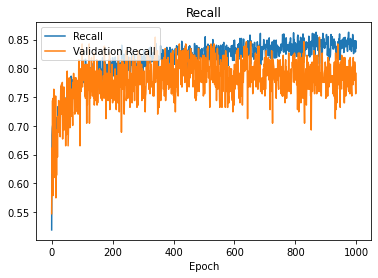

136/136 [==============================] - 1s 4ms/step - loss: 0.2105 - binary_accuracy: 0.9301 - P: 0.8895 - R: 0.8714
Train Binary Accuracy: 93.01
Train Precision: 88.95
Train Recall: 87.14
34/34 [==============================] - 0s 4ms/step - loss: 0.4527 - binary_accuracy: 0.8834 - P: 0.8094 - R: 0.7781
Test Binary Accuracy: 88.34
Test Precision: 80.94
Test Recall: 77.81


In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dense(48, activation='relu'))
nn.add(Dropout(0.2))
nn.add(Dense(96, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=metrics)
history = nn.fit(x_train, y_train, epochs=1000, verbose=0, validation_split=0.2)

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['P'], label='Precision')
plt.plot(history.history['val_P'], label='Validation Precision')
plt.title('Precision')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['R'], label='Recall')
plt.plot(history.history['val_R'], label='Validation Recall')
plt.title('Recall')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

loss, binary_accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Train Precision: %.2f' % (precision*100))
print('Train Recall: %.2f' % (recall*100))

loss, binary_accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Test Precision: %.2f' % (precision*100))
print('Test Recall: %.2f' % (recall*100))

Dropout de 0.2 en la segunda capa

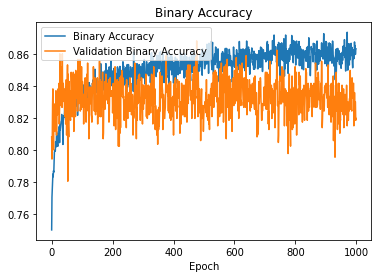

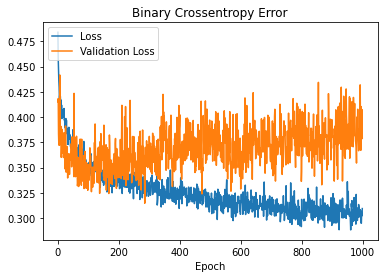

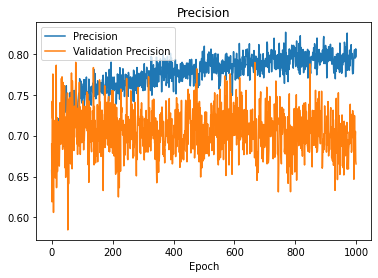

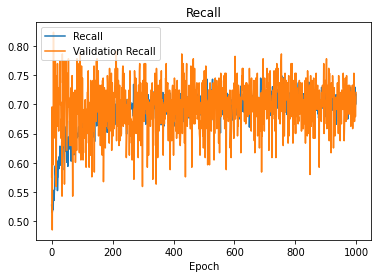

136/136 [==============================] - 1s 4ms/step - loss: 0.3511 - binary_accuracy: 0.8374 - P: 0.7163 - R: 0.7305
Train Binary Accuracy: 83.74
Train Precision: 71.63
Train Recall: 73.05
34/34 [==============================] - 0s 4ms/step - loss: 0.4399 - binary_accuracy: 0.7928 - P: 0.6538 - R: 0.6738
Test Binary Accuracy: 79.28
Test Precision: 65.38
Test Recall: 67.38


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dropout(0.2))
nn.add(Dense(48, activation='relu'))
nn.add(Dense(96, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=metrics)
history = nn.fit(x_train, y_train, epochs=1000, verbose=0, validation_split=0.2)

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['P'], label='Precision')
plt.plot(history.history['val_P'], label='Validation Precision')
plt.title('Precision')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['R'], label='Recall')
plt.plot(history.history['val_R'], label='Validation Recall')
plt.title('Recall')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

loss, binary_accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Train Precision: %.2f' % (precision*100))
print('Train Recall: %.2f' % (recall*100))

loss, binary_accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Test Precision: %.2f' % (precision*100))
print('Test Recall: %.2f' % (recall*100))

Los resultados nos indican que para estos datos **no ha sido muy efectivo** el aplicar Dropout (salvo quizá al aplicarlo solo en la primera capa, ya que en ese caso el porcentaje de acierto no se aleja tanto, pero la precisión y el recall sí), ya que hemos obtenido **valores inferiores** a los obtenidos en los experimentos anteriores, por lo que **descartamos esta técnica**.

**Quinto experimento: regularización**

Visto que el Dropout no ha dado muy buenos resultados para estos datos, vamos a proceder a aplicar técnicas de **regularización** en nuestras capas ocultas.

In [ ]:
from tensorflow.keras import regularizers

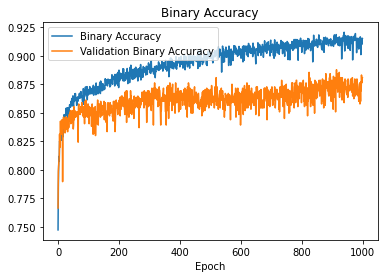

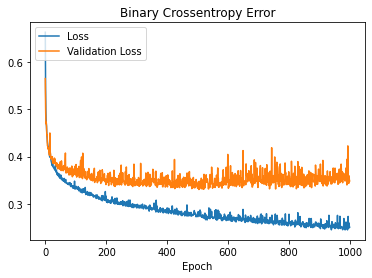

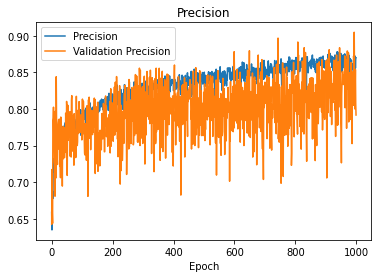

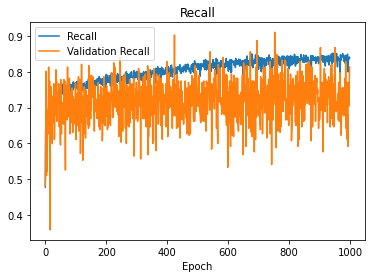

136/136 [==============================] - 0s 3ms/step - loss: 0.2656 - binary_accuracy: 0.9119 - P: 0.8291 - R: 0.8842
Train Binary Accuracy: 91.19
Train Precision: 82.91
Train Recall: 88.42
34/34 [==============================] - 0s 4ms/step - loss: 0.3288 - binary_accuracy: 0.8890 - P: 0.7919 - R: 0.8279
Test Binary Accuracy: 88.90
Test Precision: 79.19
Test Recall: 82.79


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1 = 1e-4, l2 = 1e-3)))
nn.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1 = 1e-4, l2 = 1e-3)))
nn.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1 = 1e-4, l2 = 1e-3)))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

history = nn.fit(x_train, y_train, epochs=1000, verbose=0, validation_split=0.2)

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['P'], label='Precision')
plt.plot(history.history['val_P'], label='Validation Precision')
plt.title('Precision')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['R'], label='Recall')
plt.plot(history.history['val_R'], label='Validation Recall')
plt.title('Recall')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

loss, binary_accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Train Precision: %.2f' % (precision*100))
print('Train Recall: %.2f' % (recall*100))

loss, binary_accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Test Precision: %.2f' % (precision*100))
print('Test Recall: %.2f' % (recall*100))

A la luz de estos resultados vemos que **el sobreajuste se ha reducido** (las dos gráficas de binary accuracy no están tan alejadas como antes), aunque a coste de perder algo de porcentaje de acierto, precisión y recall. En este caso, **al contrario que con el Dropout**, si apreciamos esa mejoría del sobreajuste, por lo que para los siguientes experimentos **mantendremos esta regularización**.

**Sexto experimento: SMOTE**

Por último, vamos a probar una última técnica llamada **SMOTE (Synthetic Minority Oversampling Technique)**, especialmente diseñada para mejorar los resultados en datos de entrenamiento con **clases desbalanceadas**, como es nuestro caso. En resumen, **genera nuevos datos sintéticos para balancear las clases**. Veamos si nos permite mejorar nuestros resultados con la red de tres capas que mejores resultados nos dio en los primeros experimentos.

In [ ]:
!pip install -U imblearn
from imblearn.over_sampling import SMOTE

Requirement already up-to-date: imblearn in /usr/local/lib/python3.7/dist-packages (0.0)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


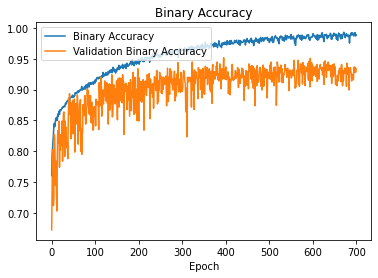

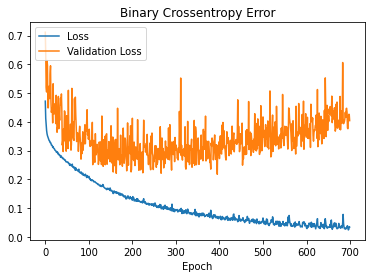

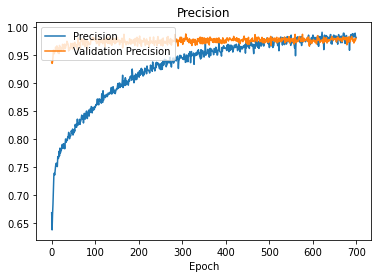

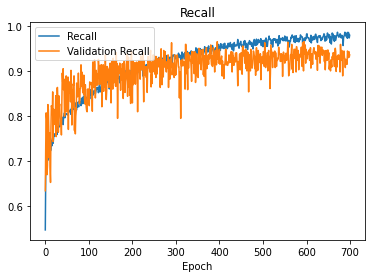

159/159 [==============================] - 1s 3ms/step - loss: 0.0998 - binary_accuracy: 0.9832 - P: 0.9872 - R: 0.9699
Train Binary Accuracy: 98.32
Train Precision: 98.72
Train Recall: 96.99
34/34 [==============================] - 0s 4ms/step - loss: 0.5505 - binary_accuracy: 0.9121 - P: 0.8576 - R: 0.8550
Test Binary Accuracy: 91.21
Test Precision: 85.76
Test Recall: 85.50


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

oversample = SMOTE(sampling_strategy=0.65)
x_train, y_train = oversample.fit_resample(x_train, y_train)

nn = Sequential()

nn.add(Input(shape=(x_size,)))
nn.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1 = 1e-4, l2 = 1e-3)))
nn.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1 = 1e-4, l2 = 1e-3)))
nn.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1 = 1e-4, l2 = 1e-3)))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

history = nn.fit(x_train, y_train, epochs=700, verbose=0, validation_split=0.2)

plt.plot(history.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Binary Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['P'], label='Precision')
plt.plot(history.history['val_P'], label='Validation Precision')
plt.title('Precision')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['R'], label='Recall')
plt.plot(history.history['val_R'], label='Validation Recall')
plt.title('Recall')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

loss, binary_accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Train Precision: %.2f' % (precision*100))
print('Train Recall: %.2f' % (recall*100))

loss, binary_accuracy, precision, recall = nn.evaluate(x_test, y_test)
print('Test Binary Accuracy: %.2f' % (binary_accuracy*100))
print('Test Precision: %.2f' % (precision*100))
print('Test Recall: %.2f' % (recall*100))

Como podemos ver, **hemos conseguido mejorar** ligeramente los resultados de esta misma red sin aplicar SMOTE, alcanzando un **91,21%** de porcentaje de acierto, un **85,76%** de precisión y un **85,50%** de recall, siendo los **mejores resultados** obtenidos en todos los experimentos realizados.

A lo largo del notebook **no se ven experimentos normalizando** los datos, ya que el **primer día de clase** ya quedó patente que esto **empeoraba** el rendimiento. El propio profesor comentó que **no** iba a ser útil para este *dataset*.

No obstante, no podemos olvidarnos que esto **suele ser beneficioso** en otros problemas de *machine learning*.

Por último, comentar que adjuntamos una **pequeña memoria** que recoge **todas las gráficas anteriores** y que **amplia los comentarios** de los experimentos, tratando de explicarlos con más detalle.